In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

headers = ["LayerID0", "dE_L0", "LayerID1", "dE_L1", "ReactionLayerID"]

df = pd.read_csv("Pareeksha_sim.csv", header=None, names=headers)


print(df.head())


   LayerID0    dE_L0  LayerID1     dE_L1  ReactionLayerID
0         0  953.511         1   967.204                0
1         0  987.471         1   991.505                1
2         0  942.489         1   960.287                0
3         0  993.205         1   983.623                1
4         0  997.433         1  1030.320              999


ReactionLayerID
0      49673
1      49216
999    10914
10         4
11         2
Name: count, dtype: int64


/Users/debajyoti/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/debajyoti/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/debajyoti/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/debajyoti/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: Matplot

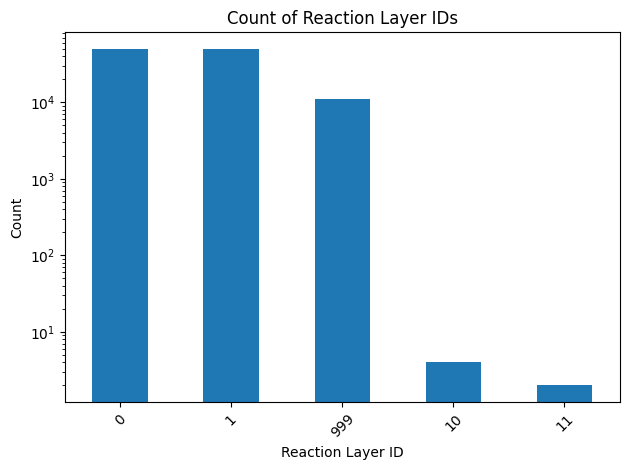

In [2]:
print(df["ReactionLayerID"].value_counts())
df["ReactionLayerID"].value_counts().plot(kind="bar", logy=True)

plt.xlabel("Reaction Layer ID")
plt.ylabel("Count")
plt.title("Count of Reaction Layer IDs")
plt.xticks(rotation=45)
plt.tight_layout()

In [3]:
df.query("ReactionLayerID==10")

,LayerID0,dE_L0,LayerID1,dE_L1,ReactionLayerID
12959,0,8.77391,1,955.413,10
61448,0,169.17000,1,960.805,10
98661,0,77.36670,1,958.934,10
104627,0,293.91700,1,964.195,10


In [12]:
df.query("ReactionLayerID==11")

,LayerID0,dE_L0,LayerID1,dE_L1,ReactionLayerID
76755,0,985.584,1,617.9310,11
104245,0,979.447,1,82.8898,11


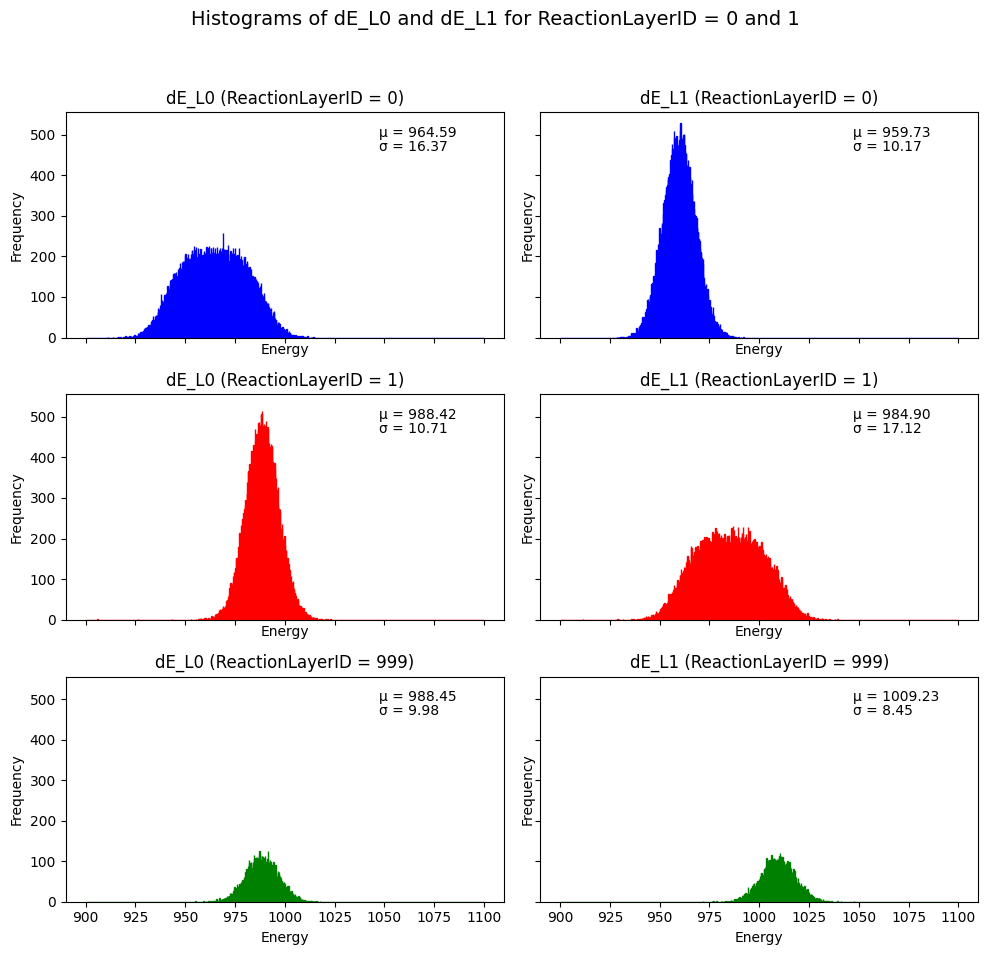

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Filter data
df0 = df.query("ReactionLayerID == 0")
df1 = df.query("ReactionLayerID == 1")
df999 = df.query("ReactionLayerID == 999")

# Create 2x2 grid
fig, axs = plt.subplots(3, 2, figsize=(10, 10), sharex=True, sharey=True)
fig.suptitle("Histograms of dE_L0 and dE_L1 for ReactionLayerID = 0 and 1", fontsize=14)

# Data for each plot
plot_data = [
    (axs[0, 0], df0["dE_L0"], "dE_L0 (ReactionLayerID = 0)", 'skyblue', 'blue'),
    (axs[0, 1], df0["dE_L1"], "dE_L1 (ReactionLayerID = 0)", 'skyblue', 'blue'),
    (axs[1, 0], df1["dE_L0"], "dE_L0 (ReactionLayerID = 1)", 'salmon', 'red'),
    (axs[1, 1], df1["dE_L1"], "dE_L1 (ReactionLayerID = 1)", 'salmon', 'red'),
    (axs[2, 0], df999["dE_L0"], "dE_L0 (ReactionLayerID = 999)", 'lightgreen', 'green'),
    (axs[2, 1], df999["dE_L1"], "dE_L1 (ReactionLayerID = 999)", 'lightgreen', 'green')
    # Add more data as needed
]

# Loop through subplots
for ax, data, title, color, edge in plot_data:
    ax.hist(data, bins=1000, range=(900, 1100), color=color, edgecolor=edge)
    ax.set_title(title)
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Energy")

    # Compute stats
    mean = data.mean()
    std = data.std()

    # Create inset
    inset = inset_axes(ax, width="30%", height="20%", loc="upper right")
    inset.axis('off')
    inset.text(0.1, 0.6, f"μ = {mean:.2f}", fontsize=10)
    inset.text(0.1, 0.3, f"σ = {std:.2f}", fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

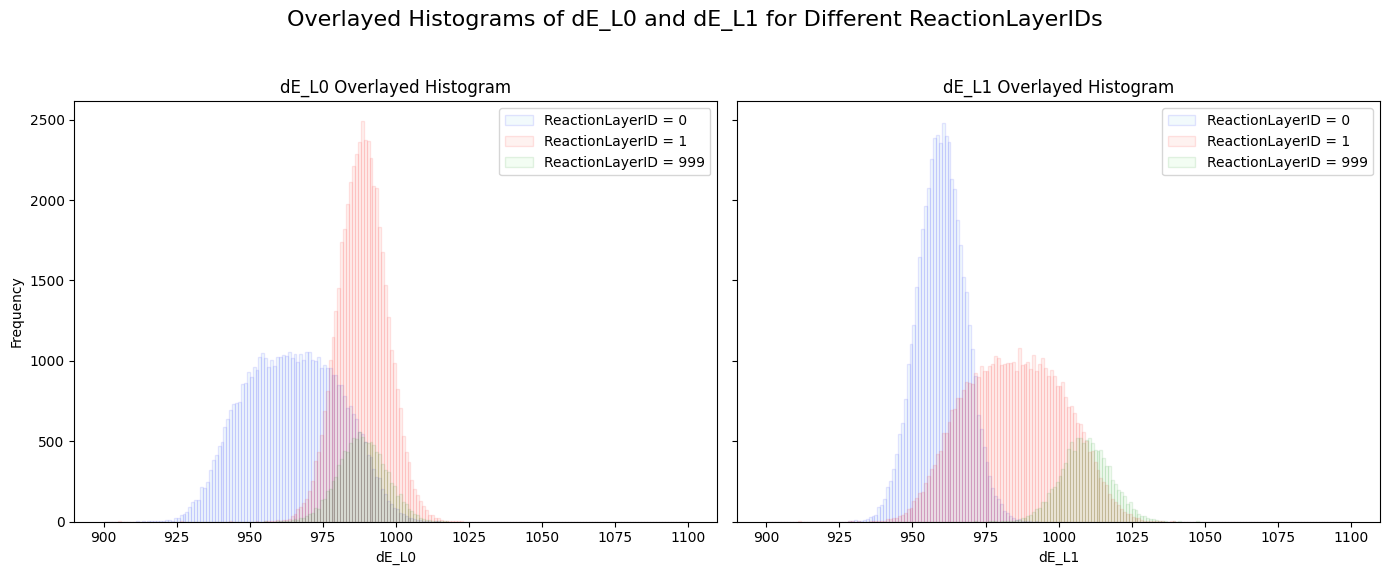

In [22]:
import matplotlib.pyplot as plt

# Filter data
df0 = df.query("ReactionLayerID == 0")
df1 = df.query("ReactionLayerID == 1")
df999 = df.query("ReactionLayerID == 999")

# Set up figure with 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("Overlayed Histograms of dE_L0 and dE_L1 for Different ReactionLayerIDs", fontsize=16)

# First subplot: dE_L0
axs[0].hist(df0["dE_L0"], bins=200, range=(900, 1100), 
            color='skyblue', edgecolor='blue', alpha=0.1, label='ReactionLayerID = 0')

axs[0].hist(df1["dE_L0"], bins=200, range=(900, 1100), 
            color='salmon', edgecolor='red', alpha=0.1, label='ReactionLayerID = 1')

axs[0].hist(df999["dE_L0"], bins=200, range=(900, 1100),
            color='lightgreen', edgecolor='green', alpha=0.1, label='ReactionLayerID = 999')

axs[0].set_xlabel("dE_L0")
axs[0].set_ylabel("Frequency")
axs[0].set_title("dE_L0 Overlayed Histogram")
axs[0].legend()

# Second subplot: dE_L1
axs[1].hist(df0["dE_L1"], bins=200, range=(900, 1100), 
            color='skyblue', edgecolor='blue', alpha=0.1, label='ReactionLayerID = 0')

axs[1].hist(df1["dE_L1"], bins=200, range=(900, 1100), 
            color='salmon', edgecolor='red', alpha=0.1, label='ReactionLayerID = 1')

axs[1].hist(df999["dE_L1"], bins=200, range=(900, 1100),
            color='lightgreen', edgecolor='green', alpha=0.1, label='ReactionLayerID = 999')

axs[1].set_xlabel("dE_L1")
axs[1].set_title("dE_L1 Overlayed Histogram")
axs[1].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load your data
headers = ["LayerID0", "dE_L0", "LayerID1", "dE_L1", "ReactionLayerID"]
df = pd.read_csv("Pareeksha_sim.csv", header=None, names=headers)

# Select features and target
X = df[["dE_L0", "dE_L1"]]
y = df["ReactionLayerID"]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[8679 1233    0    0    0]
 [1289 7761    0    0  830]
 [   0    0    1    0    0]
 [   1    0    0    0    0]
 [   1 1093    0    0 1074]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      9912
           1       0.77      0.79      0.78      9880
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         1
         999       0.56      0.50      0.53      2168

    accuracy                           0.80     21962
   macro avg       0.64      0.63      0.64     21962
weighted avg       0.79      0.80      0.80     21962



/Users/debajyoti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/debajyoti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/debajyoti/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/debajyoti/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/debajyoti/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/debajyoti/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/debajyoti/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: Matplot

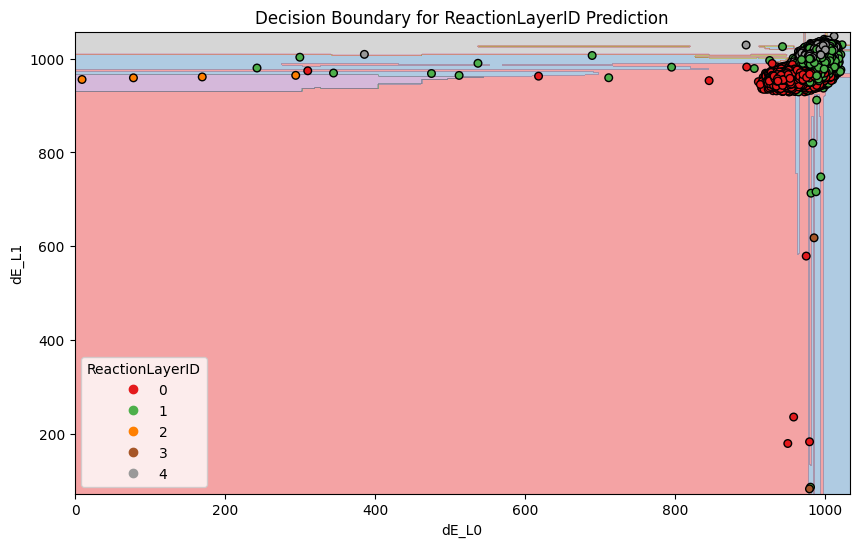

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load data
headers = ["LayerID0", "dE_L0", "LayerID1", "dE_L1", "ReactionLayerID"]
df = pd.read_csv("Pareeksha_sim.csv", header=None, names=headers)

# Feature and label selection
X = df[["dE_L0", "dE_L1"]].values
y = df["ReactionLayerID"].values

# Encode labels if they are not integers
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Meshgrid for decision boundary plotting
x_min, x_max = X[:, 0].min() - 10, X[:, 0].max() + 10
y_min, y_max = X[:, 1].min() - 10, X[:, 1].max() + 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Set1')
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', edgecolor='k', s=30)
plt.xlabel("dE_L0")
plt.ylabel("dE_L1")
plt.title("Decision Boundary for ReactionLayerID Prediction")

# Add legend
plt.legend(*scatter.legend_elements(), title="ReactionLayerID")
plt.show()
